 Level 1: Variable Identification 


In [ ]:
!pip install pandas numpy matplotlib seaborn

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

  Using cached pandas-2.2.3-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.3-cp313-cp313-win_amd64.whl (11.5 MB)
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.6 MB 6.8 MB/s eta 0:00:02
   ----- ---------------------------------- 1.8/12.6 MB 4.8 MB/s eta 0:00:03
   --------- ------------------------------ 3.1/12.6 MB 5.3 MB/s eta 0:00:02
   ------------ --------------------------- 3.9/12.6 MB 4.8 MB/s eta 0:00:02
   --------------- ------------------------ 5.0/12.6 MB 4.9 MB/s eta 0:00:02
   ------------------- -------------------- 6.3/12.6 MB 5.1 MB/s eta 0:00:02
   ------------------------ --------------- 7.9/12.6 MB 5.5 MB/s eta 0:00:01
   --------------------------- ------------ 8.7/12.6 MB 5.2 MB/s eta 0:00:01
   ----------------------------- ---------- 9.4/

In [11]:
#setting
sns.set(style="whitegrid")
#to show all columns

pd.set_option('display.max_columns', None)

In [12]:

#loading the dataset
df = pd.read_csv(r'C:\Users\chara\Downloads\ml task\Dataset.csv')

In [13]:
# print all the featuers
print("Feature_1:")
print(df['Feature_1'].describe())
print("Feature_2:")
print(df['Feature_2'].describe())
print("Feature_3:")
print(df['Feature_3'].describe())

Feature_1:
count    611.000000
mean      16.747954
std        1.216812
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: Feature_1, dtype: float64
Feature_2:
count    603.000000
mean       1.913765
std        0.830798
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: Feature_2, dtype: float64
Feature_3:
count    610.000000
mean       2.262295
std        1.285279
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: Feature_3, dtype: float64


In [14]:
# find all the unique values
print("Unique  in Feature_1:", df['Feature_1'].unique())
print("Unique  in Feature_2:", df['Feature_2'].unique())
print("Unique  in Feature_3:", df['Feature_3'].unique())

Unique  in Feature_1: [18. 17. 15. 16. nan 19. 22. 20. 21.]
Unique  in Feature_2: [ 2. nan  3.  1.  4.]
Unique  in Feature_3: [ 1.  3.  2.  4. nan  5.]


In [15]:
#we can see nan values in all the features
#so find the no of missing in each feature
print("\nMissing values:")
print(df[['Feature_1', 'Feature_2', 'Feature_3']].isnull().sum())


Missing values:
Feature_1    38
Feature_2    46
Feature_3    39
dtype: int64


2.Distribution

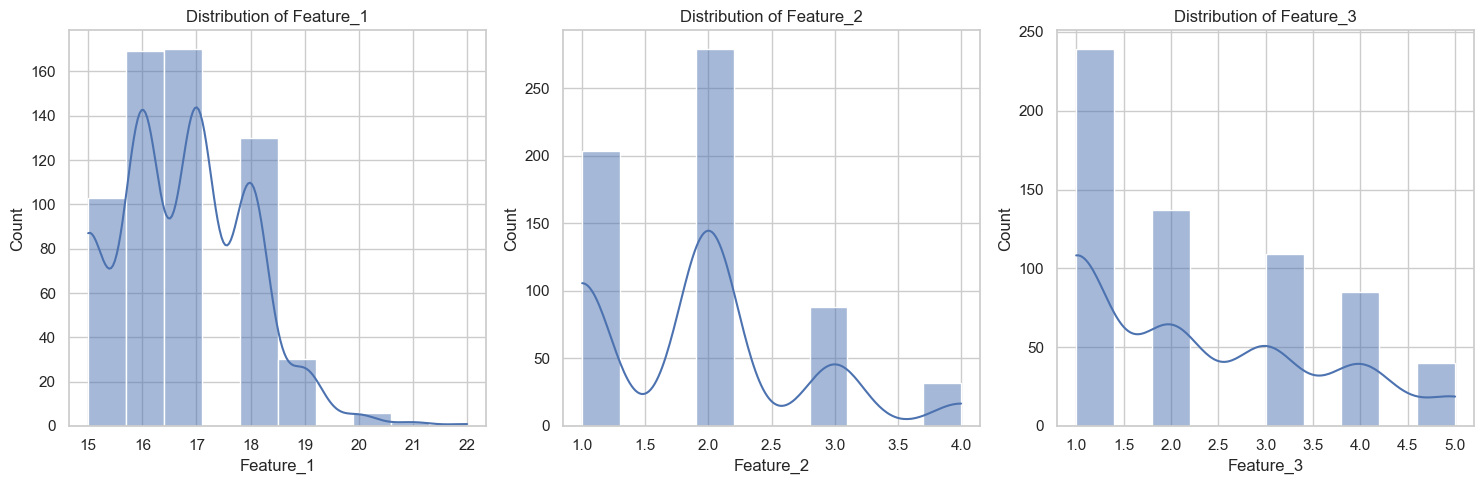

In [11]:
#hist plot gives the frequency of the occuring of the each feature

plt.figure(figsize=(15, 5))
for i, feature in enumerate(['Feature_1', 'Feature_2', 'Feature_3'], 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[feature].dropna(), bins=10, kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

3.CORRELATION ANALYSIS

In [16]:
# seaborn heatmap helps us to correlate the unknown features with known
num_cols = ['Medu', 'Fedu', 'traveltime', 'failures', 'famrel', 'freetime', 
                  'goout', 'Dalc', 'health', 'absences', 'G1', 'G2', 'G3', 
                  'Feature_1', 'Feature_2', 'Feature_3']
correlation = df[num_cols].corr()

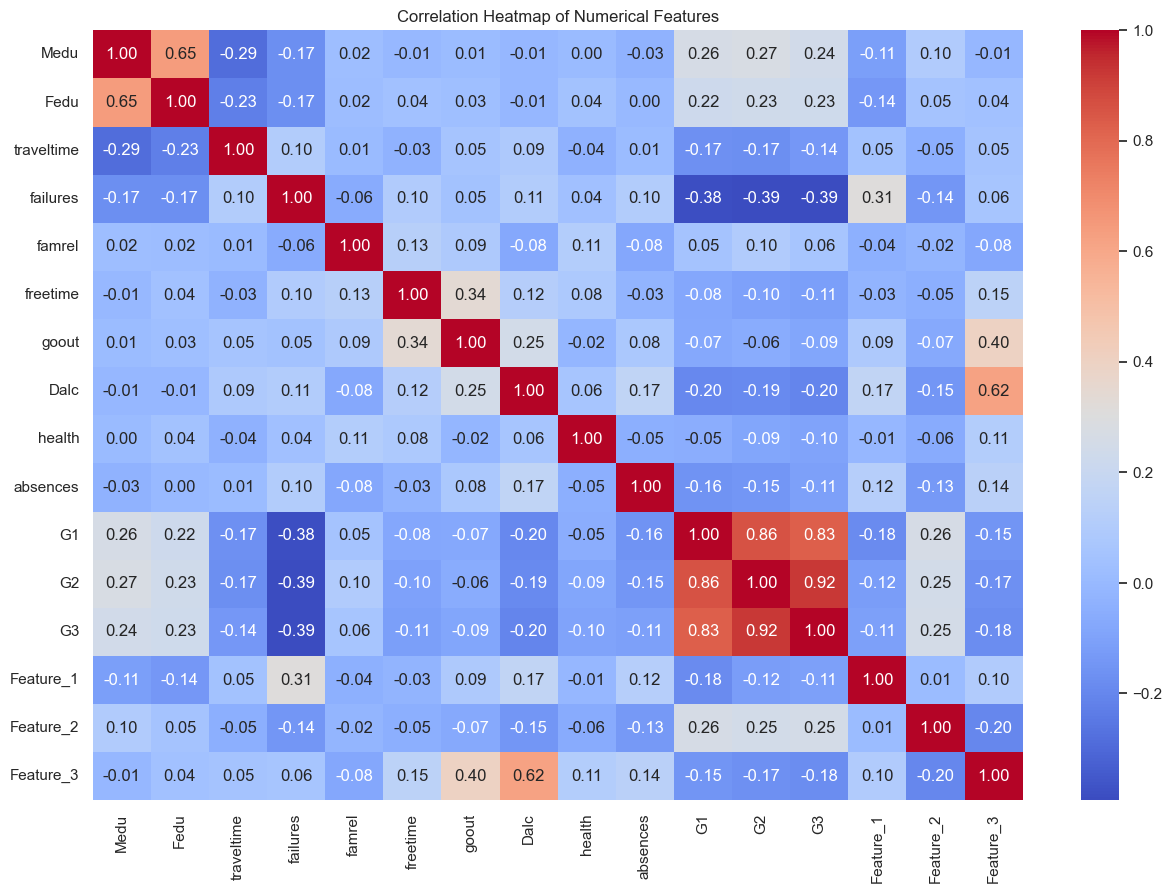

In [17]:
plt.figure(figsize=(15, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [18]:
# in the correlation heatmap if two features are closest to 1 the have high correlation
# in feature_1 matrix failures is near to it and negative with G1
#in feature2 matrix  it shows posituve with G1,G2,G3 and negative with dalc
# in feature3 it shows posituve with dalc and goout and neg with feature2

In [19]:
#  Feature_1 can be student_distress_level or academicunderperformence

In [20]:
# Feature_2 can be highperformance or excellencylevel


In [21]:
# Feature_3 can be  distraction_index  or  socializing

In [22]:
print(df.head())

  school sex address famsize Pstatus  Medu  Fedu     Mjob      Fjob  reason  \
0     GP   F       U     GT3       A     4   4.0  at_home   teacher  course   
1     GP   F       U     GT3       T     1   1.0  at_home     other  course   
2     GP   F       U     LE3       T     1   1.0  at_home     other   other   
3     GP   F       U     GT3       T     4   2.0   health  services    home   
4     GP   F       U     GT3       T     3   3.0    other     other    home   

  guardian  traveltime  failures schoolsup famsup paid activities nursery  \
0   mother         2.0         0       yes     no   no         no     yes   
1   father         NaN         0        no    yes   no         no      no   
2   mother         1.0         0       yes     no   no         no     yes   
3   mother         1.0         0        no    yes   no        yes     yes   
4   father         1.0         0        no    yes   no         no     yes   

  higher internet  famrel  freetime  goout  Dalc  health  abse

leve;2: DATA AMPUTATION

In [23]:
#imputation involves replacing missing values with cal values such as
# mean,meadian or mode of the corresponding feature

In [24]:
print (df.isnull().sum().sum())

544


In [25]:
df.replace(["", " ", "  ", "NA", "N/A", "?", "None"], np.nan, inplace=True)



In [26]:
print(df.isnull().sum())

school         0
sex            0
address        0
famsize       50
Pstatus        0
Medu           0
Fedu          73
Mjob           0
Fjob           0
reason         0
guardian       0
traveltime    73
failures       0
schoolsup      0
famsup         0
paid           0
activities     0
nursery        0
higher        76
internet       0
famrel         0
freetime      45
goout          0
Dalc           0
health         0
absences      69
G1             0
G2            35
G3             0
Feature_1     38
Feature_2     46
Feature_3     39
romantic       0
dtype: int64


In [27]:
# for imputing we must divide it into categorical and ordinal values
#the imputational strategies for each column are
imputation_strategies = {
    'famsize': 'mode',
    'Fedu': 'median',
    'traveltime': 'median',
    'nursery': 'mode',
    'higher': 'mode',
    'internet': 'mode',
    'freetime': 'median',
    'absences': 'median',
    'G2': 'median',
    'Feature_1': 'median',
    'Feature_2': 'median',
    'Feature_3': 'mode'
}

In [31]:
# the justification for this imputation is
imputation_justifications = {
    'famsize':  Modeimputation preserves the distributiom the most common family size  survey data.",
    'Fedu': " Median imputation preserves the ordered nature and handles potential skewness in education levels.",
    'traveltime': "Median imputation is robust to skewness, as most students likely live close to school.",
    'nursery': "Mode imputation reflects the most common response, typical for binary survey data.",
    'higher': " Mode imputation preserves the majority trend, as most students may want higher education.",
    'internet': " Mode imputation aligns with the most common response for internet access in survey data.",
    'freetime': " Median imputation handles skewness and preserves the ordinal scale.",
    'absences': "Median imputation is robust to skewness, avoiding overestimation of absences.",
    'G2': " Median imputation handles skewness in grade distribution for consistency in analysis.",
    'Feature_1': " Median imputation preserves the ordered scale and mitigates skewness.",
    'Feature_2': " Median imputation maintains the ordinal scale and handles skewness.",
    'Feature_3': "Mode imputation preserves the most common category in survey data."
}


SyntaxError: unterminated string literal (detected at line 3) (2292201517.py, line 3)

In [32]:
# Apply imputation without inplace=True
for column, strategy in imputation_strategies.items():
    if column in df.columns:
        if strategy == 'median':
            df[column] = df[column].fillna(df[column].median())
        elif strategy == 'mode':
            df[column] = df[column].fillna(df[column].mode()[0])

In [33]:
print("\nMissing Values After Imputation:")
print(df.isnull().sum())


Missing Values After Imputation:
school        0
sex           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
famrel        0
freetime      0
goout         0
Dalc          0
health        0
absences      0
G1            0
G2            0
G3            0
Feature_1     0
Feature_2     0
Feature_3     0
romantic      0
dtype: int64


SAVE IT TO NEWDATASET

In [34]:
df.to_csv('newdataset.csv', index=False)

In [35]:
#now we must perform EDA on the newdataset

In [36]:
#loading the dataset
df = pd.read_csv(r'C:\Users\chara\Downloads\ml task\newdataset.csv')

In [37]:
print(df.head())

  school sex address famsize Pstatus  Medu  Fedu     Mjob      Fjob  reason  \
0     GP   F       U     GT3       A     4   4.0  at_home   teacher  course   
1     GP   F       U     GT3       T     1   1.0  at_home     other  course   
2     GP   F       U     LE3       T     1   1.0  at_home     other   other   
3     GP   F       U     GT3       T     4   2.0   health  services    home   
4     GP   F       U     GT3       T     3   3.0    other     other    home   

  guardian  traveltime  failures schoolsup famsup paid activities nursery  \
0   mother         2.0         0       yes     no   no         no     yes   
1   father         1.0         0        no    yes   no         no      no   
2   mother         1.0         0       yes     no   no         no     yes   
3   mother         1.0         0        no    yes   no        yes     yes   
4   father         1.0         0        no    yes   no         no     yes   

  higher internet  famrel  freetime  goout  Dalc  health  abse

 Level 3: Exploratory Insight Report



EDA TECHNIQUES

In [38]:
# Summary statistics for numerical columns
numerical_cols = ['G1', 'G2', 'G3', 'absences', 'freetime', 'Feature_1', 'Feature_2', 'Feature_3']
print("\nSummary Statistics for Numerical Columns:")
print(df[numerical_cols].describe())


Summary Statistics for Numerical Columns:
               G1          G2          G3    absences    freetime   Feature_1  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean    11.399076   11.554700   11.906009    3.560863    3.160247   16.762712   
std      2.745265    2.850793    3.230656    4.506142    1.008708    1.182079   
min      0.000000    0.000000    0.000000    0.000000    1.000000   15.000000   
25%     10.000000   10.000000   10.000000    0.000000    3.000000   16.000000   
50%     11.000000   11.000000   12.000000    2.000000    3.000000   17.000000   
75%     13.000000   13.000000   14.000000    5.000000    4.000000   18.000000   
max     19.000000   19.000000   19.000000   32.000000    5.000000   22.000000   

        Feature_2   Feature_3  
count  649.000000  649.000000  
mean     1.919877    2.186441  
std      0.801073    1.281661  
min      1.000000    1.000000  
25%      1.000000    1.000000  
50%      2.000000    2.000000  
75%

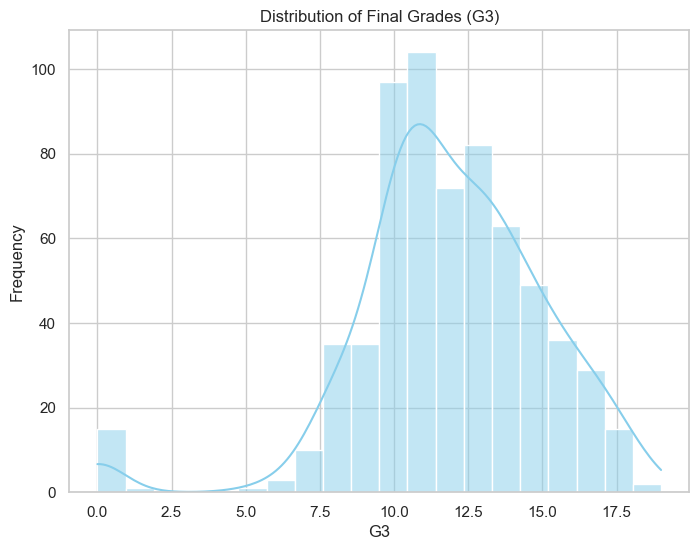

In [39]:
# Histogram of final grades (G3)
plt.figure(figsize=(8, 6))
sns.histplot(df['G3'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('G3')
plt.ylabel('Frequency')
plt.show()

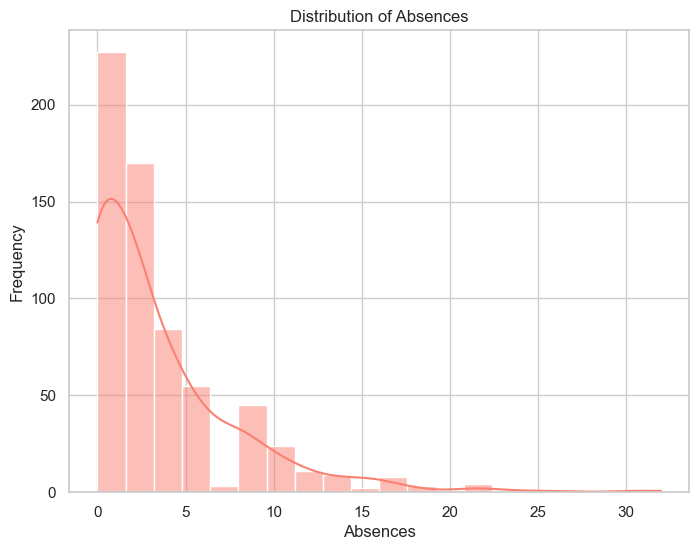

In [40]:
# Histogram of absences
plt.figure(figsize=(8, 6))
sns.histplot(df['absences'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Absences')
plt.xlabel('Absences')
plt.ylabel('Frequency')
plt.show()

In [41]:
# Correlation matrix for numerical variables
corr_matrix = df[numerical_cols].corr()
print("\nCorrelation Matrix:")
print(corr_matrix)


Correlation Matrix:
                 G1        G2        G3  absences  freetime  Feature_1  \
G1         1.000000  0.839090  0.826387 -0.142246 -0.078858  -0.173833   
G2         0.839090  1.000000  0.896415 -0.124805 -0.098041  -0.110171   
G3         0.826387  0.896415  1.000000 -0.086584 -0.107603  -0.102429   
absences  -0.142246 -0.124805 -0.086584  1.000000 -0.030668   0.109621   
freetime  -0.078858 -0.098041 -0.107603 -0.030668  1.000000  -0.021125   
Feature_1 -0.173833 -0.110171 -0.102429  0.109621 -0.021125   1.000000   
Feature_2  0.255255  0.227623  0.235604 -0.115785 -0.041380   0.014115   
Feature_3 -0.134338 -0.155057 -0.166459  0.119745  0.143969   0.091381   

           Feature_2  Feature_3  
G1          0.255255  -0.134338  
G2          0.227623  -0.155057  
G3          0.235604  -0.166459  
absences   -0.115785   0.119745  
freetime   -0.041380   0.143969  
Feature_1   0.014115   0.091381  
Feature_2   1.000000  -0.165796  
Feature_3  -0.165796   1.000000  


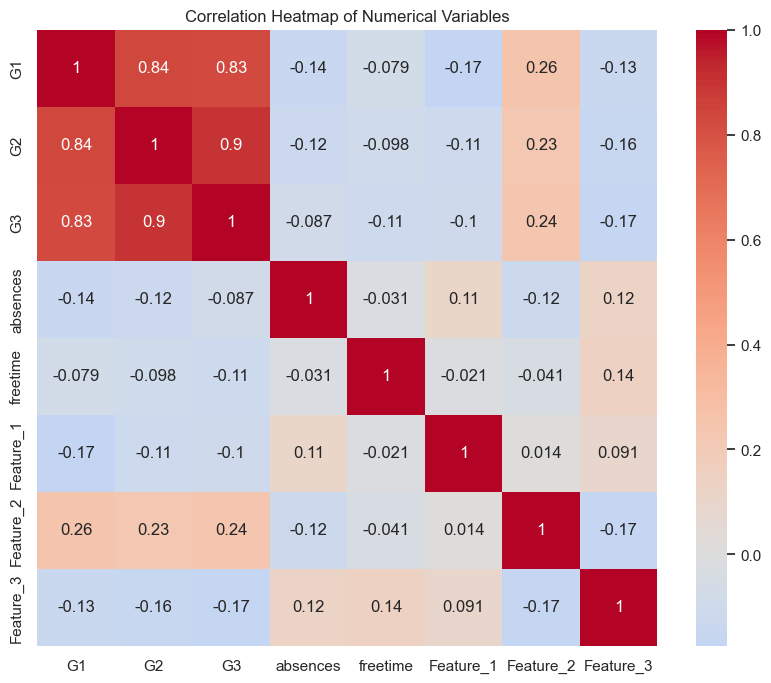

In [42]:
# Heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

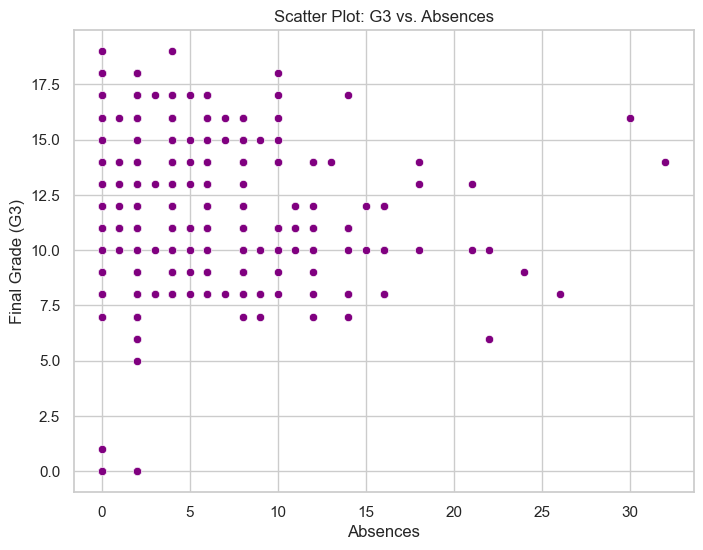

In [119]:
## Step 6: Scatter Plot for G3 vs. Absences
plt.figure(figsize=(8, 6))
sns.scatterplot(x='absences', y='G3', data=df, color='purple')
plt.title('Scatter Plot: G3 vs. Absences')
plt.xlabel('Absences')
plt.ylabel('Final Grade (G3)')
plt.show()

In [120]:
# Average G3 by sex
print("\nAverage G3 by Sex:")
print(df.groupby('sex')['G3'].mean())



Average G3 by Sex:
sex
F    12.253264
M    11.406015
Name: G3, dtype: float64


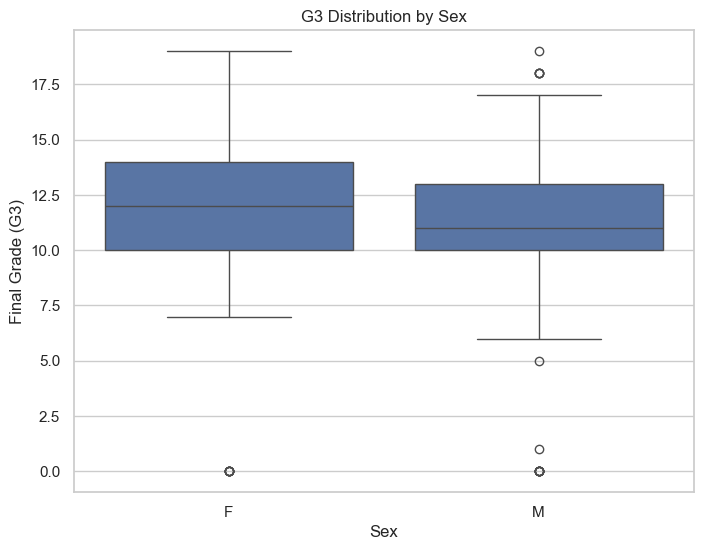

In [122]:
# Boxplot of G3 by sex
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='G3', data=df)
plt.title('G3 Distribution by Sex')
plt.xlabel('Sex')
plt.ylabel('Final Grade (G3)')
plt.show()

In [125]:
# Average G3 by internet access
print("\nAverage G3 by Internet Access:")
print(df.groupby('internet')['G3'].mean())


Average G3 by Internet Access:
internet
no     11.026490
yes    12.172691
Name: G3, dtype: float64


In [127]:
# Average G3 by freetime levels
print("\nAverage G3 by Freetime Levels:")
print(df.groupby('freetime')['G3'].mean())


Average G3 by Freetime Levels:
freetime
1.0    11.904762
2.0    12.570000
3.0    12.010753
4.0    11.726190
5.0    10.816667
Name: G3, dtype: float64


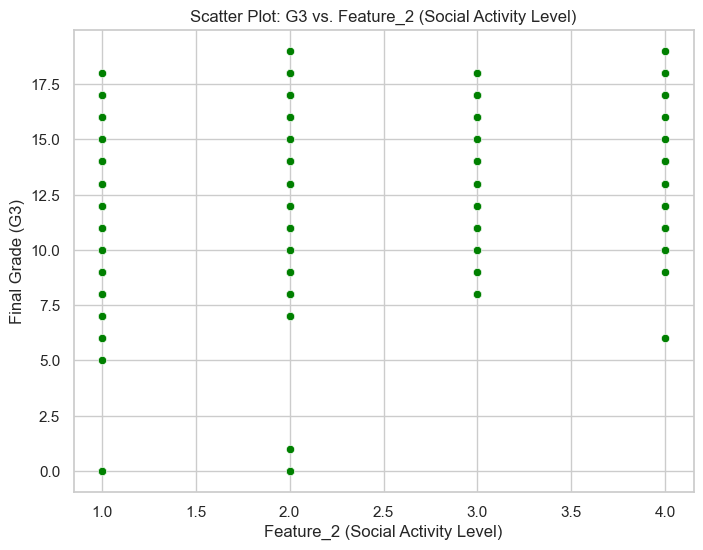

In [130]:
# Scatter plot of G3 vs. Feature_2 (hypothesized as social activity level)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Feature_2', y='G3', data=df, color='green')
plt.title('Scatter Plot: G3 vs. Feature_2 (Social Activity Level)')
plt.xlabel('Feature_2 (Social Activity Level)')
plt.ylabel('Final Grade (G3)')
plt.show()

RELATIONSHIP MODEL

In [45]:
!pip install scikit-learn

In [46]:
# Logistic Regression and Random Forest classification on romantic relationship prediction

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Load the dataset
df = pd.read_csv("Dataset.csv")

# Encode categorical variables
df_encoded = df.copy()
label_encoders = {}
for col in df_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le

# Impute missing values
imputer = SimpleImputer(strategy='most_frequent')
df_imputed = pd.DataFrame(imputer.fit_transform(df_encoded), columns=df_encoded.columns)



In [47]:
# Train-test split
X = df_imputed.drop(columns=['romantic'])
y = df_imputed['romantic']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42)
}

In [48]:
# Evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("="*60)

Model: Logistic Regression
Accuracy: 0.5923076923076923
Classification Report:
              precision    recall  f1-score   support

         0.0       0.64      0.80      0.71        81
         1.0       0.43      0.24      0.31        49

    accuracy                           0.59       130
   macro avg       0.53      0.52      0.51       130
weighted avg       0.56      0.59      0.56       130

Model: Random Forest
Accuracy: 0.5692307692307692
Classification Report:
              precision    recall  f1-score   support

         0.0       0.61      0.83      0.71        81
         1.0       0.33      0.14      0.20        49

    accuracy                           0.57       130
   macro avg       0.47      0.49      0.45       130
weighted avg       0.51      0.57      0.51       130



In [55]:

!pip install shap

  Using cached shap-0.47.2.tar.gz (2.6 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached slicer-0.0.8-py3-none-any.whl.metadata (4.0 kB)
  Using cached numba-0.61.2-cp313-cp313-win_amd64.whl.metadata (2.8 kB)
  Using cached cloudpickle-3.1.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached typing_extensions-4.13.2-py3-none-any.whl.metadata (3.0 kB)
  Using cached llvmlite-0.44.0-cp313-cp313-win_amd64.whl.metadata (5.0 kB)
Using cached slicer-0.0.8-py3-none-any.whl (15 kB)
Using cached numba-0.61.2-cp313-cp313-win_amd64.whl (2.8 MB)
Using cached llvmlite-0.44.0-cp313-cp313-win_amd64.whl (30.3 MB)
Using cached tqdm-4.67.1-py3-none-an

  error: subprocess-exited-with-error
  
  × Building wheel for shap (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [260 lines of output]
      Attempting to build SHAP: with_binary=True, with_cuda=True (Attempt 1)
      The nvcc binary could not be located in your $PATH. Either add it to your path, or set $CUDAHOME to enable CUDA.
      Exception occurred during setup, Error building cuda module: TypeError('cannot unpack non-iterable NoneType object')
      Retrying SHAP build without cuda extension...
      Attempting to build SHAP: with_binary=True, with_cuda=False (Attempt 2)
      C:\Users\chara\AppData\Local\Temp\pip-build-env-lu02691a\overlay\Lib\site-packages\setuptools\config\_apply_pyprojecttoml.py:82: SetuptoolsDeprecationWarning: `project.license` as a TOML table is deprecated
      !!
      
              ********************************************************************************
              Please use a simple string containing a SPDX expression 

In [50]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [52]:

# Load dataset
df = pd.read_csv("newdataset.csv")

# Encode categorical variables
df_encoded = df.copy()
label_encoders = {}
for col in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le

In [53]:
# Impute missing values
imputer = SimpleImputer(strategy="most_frequent")
df_imputed = pd.DataFrame(imputer.fit_transform(df_encoded), columns=df_encoded.columns)

# Features and target
X = df_imputed.drop(columns=["romantic"])
y = df_imputed["romantic"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [56]:
import shap

xplainer = shap.Explainer(rf, X_train)
shap_values = explainer(X_test)

# Global feature importance
shap.summary_plot(shap_values.values, X_test, plot_type="bar")

ModuleNotFoundError: No module named 'shap'